In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Midterm Review

0-10 mins

## Deflategate

10-40 mins

You can click the link to get the blank notebook! Just make sure to rename it to something else so that you can click the link again to get the one from class.

**Steps:**

1. Look at data
2. Choose a test statistic
3. Simulate samples under the null
4. Calculate p-value

### Step 1

Discussion question: Come up with 5 questions about this data with your partner. What other information do you need?

In [33]:
football = Table.read_table('http://inferentialthinking.com/notebooks/football.csv')
football = football.drop('Team')
football.show()

Ball,Blakeman,Prioleau
Patriots 1,11.5,11.8
Patriots 2,10.85,11.2
Patriots 3,11.15,11.5
Patriots 4,10.7,11
Patriots 5,11.1,11.45
Patriots 6,11.6,11.95
Patriots 7,11.85,12.3
Patriots 8,11.1,11.55
Patriots 9,10.95,11.35
Patriots 10,10.5,10.9


In [34]:
averages = (football.column(1)+football.column(2))/2
football.with_column('Average at Half', averages).show()

Ball,Blakeman,Prioleau,Average at Half
Patriots 1,11.5,11.8,11.65
Patriots 2,10.85,11.2,11.025
Patriots 3,11.15,11.5,11.325
Patriots 4,10.7,11,10.85
Patriots 5,11.1,11.45,11.275
Patriots 6,11.6,11.95,11.775
Patriots 7,11.85,12.3,12.075
Patriots 8,11.1,11.55,11.325
Patriots 9,10.95,11.35,11.15
Patriots 10,10.5,10.9,10.7


In [35]:
initials = np.append(np.ones(11) * 12.5, np.ones(4) * 13)
averages = (football.column(1)+football.column(2))/2
football = football.with_column(
    'Team', np.char.strip(football.column('Ball'), [' 1234567890']),
    'Average at Half', averages,
    'Estimate at Start', initials,
    'Drop', initials - averages
)
football.show()

Ball,Blakeman,Prioleau,Team,Average at Half,Estimate at Start,Drop
Patriots 1,11.5,11.8,Patriots,11.65,12.5,0.85
Patriots 2,10.85,11.2,Patriots,11.025,12.5,1.475
Patriots 3,11.15,11.5,Patriots,11.325,12.5,1.175
Patriots 4,10.7,11,Patriots,10.85,12.5,1.65
Patriots 5,11.1,11.45,Patriots,11.275,12.5,1.225
Patriots 6,11.6,11.95,Patriots,11.775,12.5,0.725
Patriots 7,11.85,12.3,Patriots,12.075,12.5,0.425
Patriots 8,11.1,11.55,Patriots,11.325,12.5,1.175
Patriots 9,10.95,11.35,Patriots,11.15,12.5,1.35
Patriots 10,10.5,10.9,Patriots,10.7,12.5,1.8


In [57]:
drops = football.select('Team', 'Drop')
drops

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


Discussion question: What visualization would work best for seeing the difference between Patriot and Colt balls?

(0, 3)

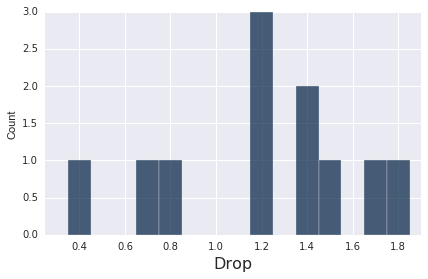

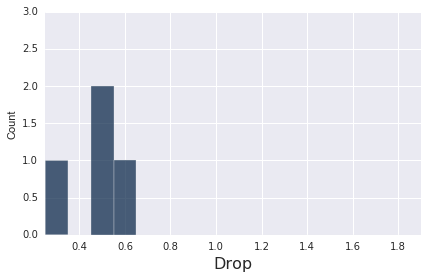

In [58]:
drops.where('Team', 'Patriots').hist(1, bins=np.arange(0.25, 2, 0.1), normed=False)
plt.xlim(0.25, 1.9)
plt.ylim(0, 3)
drops.where('Team', 'Colts').hist(1, bins=np.arange(0.25, 2, 0.1), normed=False)
plt.xlim(0.25, 1.9)
plt.ylim(0, 3)

(array([ 1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 array([ 0.25,  0.35,  0.45,  0.55,  0.65,  0.75,  0.85,  0.95,  1.05,
         1.15,  1.25,  1.35,  1.45,  1.55,  1.65,  1.75,  1.85,  1.95]),
 <a list of 17 Patch objects>)

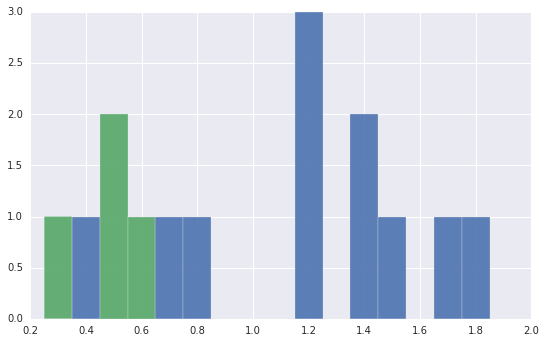

In [80]:
plt.hist(drops.where('Team', 'Patriots').column('Drop'),
         bins=np.arange(0.25, 2, 0.1),
         alpha=0.9,
         normed=False)
plt.hist(drops.where('Team', 'Colts').column('Drop'),
         bins=np.arange(0.25, 2, 0.1),
         alpha=0.9,
         normed=False)

### Step 2

Discussion question: What test statistic would you use to compare the two samples? We're looking for a single number that gets bigger the more different the two samples are.

In [60]:
drops

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


In [62]:
drops.group('Team', np.average)

Team,Drop average
Colts,0.46875
Patriots,1.20227


In [83]:
def difference_in_average_drop(t):
    averages = t.select('Team', 'Drop').group('Team', np.average).column(1)
    return np.abs(averages.item(1) - averages.item(0))

observed = difference_in_average_drop(drops)
observed

0.73352272727272805

### Step 3

Discussion question: How would you simulate another sample under the null? Remember that the null is: the Patriots' and the Colts' drops come from the same distribution.

Take attendance while discussing.

**Key idea: Shuffling the drops gives us another sample under the null**

In [75]:
shuffled = drops.select('Drop').sample(15, with_replacement=False)
sample = drops.select('Team').with_column('Drop', shuffled.column(0))
sample

Team,Drop
Patriots,0.85
Patriots,0.65
Patriots,1.35
Patriots,1.8
Patriots,1.375
Patriots,1.225
Patriots,1.65
Patriots,0.475
Patriots,1.175
Patriots,0.725


In [76]:
sample.group('Team', np.average)

Team,Drop average
Colts,0.5875
Patriots,1.15909


(0, 3)

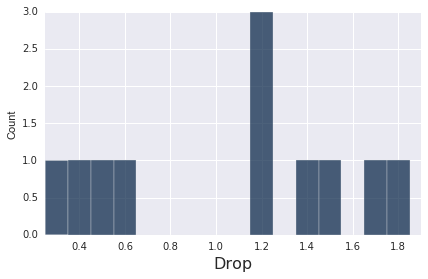

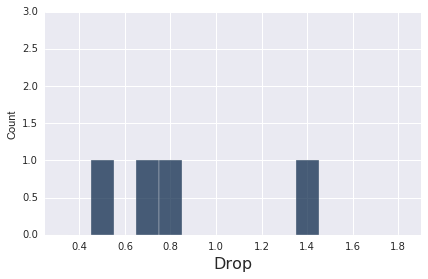

In [47]:
sample.select('Team', 'Drop').where('Team', 'Patriots').hist(1, bins=np.arange(0.25, 2, 0.1), normed=False)
plt.xlim(0.25, 1.9)
plt.ylim(0, 3)
sample.select('Team', 'Drop').where('Team', 'Colts').hist(1, bins=np.arange(0.25, 2, 0.1), normed=False)
plt.xlim(0.25, 1.9)
plt.ylim(0, 3)

In [39]:
difference_in_average_drop(sample)

0.10284090909090882

In [84]:
sampled_stats = make_array()

for i in np.arange(10000):
    shuffled = football.select('Drop').sample(15, with_replacement=False)
    sample = football.select('Team').with_column('Drop', shuffled.column(0))    
    sampled_stats = np.append(sampled_stats, difference_in_average_drop(sample))

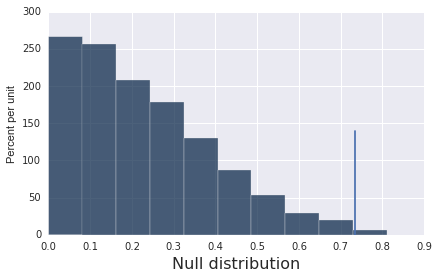

In [85]:
Table().with_column('Null distribution', sampled_stats).hist()
_ = plt.plot([observed, observed], [0, 1.4])

### Step 4

In [86]:
np.count_nonzero(sampled_stats >= observed)/len(sampled_stats)

0.0041